In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Not Spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,Not Spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,Not Spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,Not Spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5567,Not Spam,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5568,Not Spam,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5569,Not Spam,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5571, 5)

In [6]:
#Data Cleaning
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df

,v1,v2
0,Not Spam,"Go until jurong point, crazy.. Available only ..."
1,Not Spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not Spam,U dun say so early hor... U c already then say...
4,Not Spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,Not Spam,Will Ì_ b going to esplanade fr home?
5568,Not Spam,"Pity, * was in mood for that. So...any other s..."
5569,Not Spam,The guy did some bitching but I acted like i'd...


In [8]:
df.sample(3)

,v1,v2
473,Not Spam,Nice line said by a broken heart- Plz don't cu...
1517,Not Spam,Shall i ask one thing if you dont mistake me.
117,Not Spam,Hmm...my uncle just informed me that he's payi...


In [9]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [10]:
df

,Target,Text
0,Not Spam,"Go until jurong point, crazy.. Available only ..."
1,Not Spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not Spam,U dun say so early hor... U c already then say...
4,Not Spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,Not Spam,Will Ì_ b going to esplanade fr home?
5568,Not Spam,"Pity, * was in mood for that. So...any other s..."
5569,Not Spam,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['Target']=encoder.fit_transform(df['Target'])

In [13]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5566,1,This is the 2nd time we have tried 2 contact u...
5567,0,Will Ì_ b going to esplanade fr home?
5568,0,"Pity, * was in mood for that. So...any other s..."
5569,0,The guy did some bitching but I acted like i'd...


In [14]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df.drop_duplicates(keep='first',inplace=True)

In [17]:
df.shape

(5168, 2)

In [18]:
df.duplicated().sum()

0

EDA

In [19]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['Target'].value_counts()

Target
0    4515
1     653
Name: count, dtype: int64

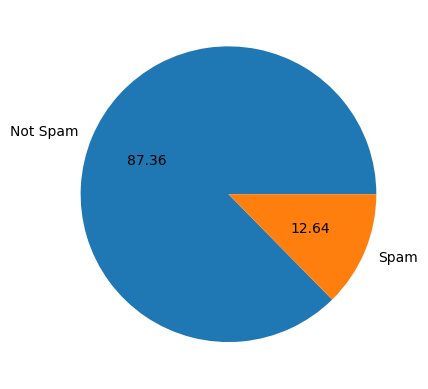

In [21]:
plt.pie(df['Target'].value_counts(),labels=['Not Spam','Spam'],autopct='%0.2f')
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Manali
[nltk_data]     Pusalkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters']=df['Text'].apply(len)

In [25]:
df

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5566,1,This is the 2nd time we have tried 2 contact u...,161
5567,0,Will Ì_ b going to esplanade fr home?,37
5568,0,"Pity, * was in mood for that. So...any other s...",57
5569,0,The guy did some bitching but I acted like i'd...,125


In [26]:
df['num_word']=df['Text'].apply(lambda x: nltk.word_tokenize(x)).apply(len)

In [27]:
df['num_sentence']=df['Text'].apply(lambda x: nltk.sent_tokenize(x)).apply(len)

In [28]:
df

,Target,Text,num_characters,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5566,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5567,0,Will Ì_ b going to esplanade fr home?,37,9,1
5568,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5569,0,The guy did some bitching but I acted like i'd...,125,27,1


In [29]:
df[['num_characters','num_word','num_sentence']].describe

<bound method NDFrame.describe of       num_characters  num_word  num_sentence
0                111        24             2
1                 29         8             2
2                155        37             2
3                 49        13             1
4                 61        15             1
...              ...       ...           ...
5566             161        35             4
5567              37         9             1
5568              57        15             2
5569             125        27             1
5570              26         7             2

[5168 rows x 3 columns]>

In [30]:
df[df['Target']==0][['num_characters','num_word','num_sentence']].describe

<bound method NDFrame.describe of       num_characters  num_word  num_sentence
0                111        24             2
1                 29         8             2
3                 49        13             1
4                 61        15             1
6                 77        18             2
...              ...       ...           ...
5564              12         4             1
5567              37         9             1
5568              57        15             2
5569             125        27             1
5570              26         7             2

[4515 rows x 3 columns]>

In [31]:
df[df['Target']==1][['num_characters','num_word','num_sentence']].describe

<bound method NDFrame.describe of       num_characters  num_word  num_sentence
2                155        37             2
5                148        39             4
8                158        32             5
9                154        31             3
11               136        31             3
...              ...       ...           ...
5536              90        18             3
5539             160        38             6
5546             160        35             5
5565             147        30             1
5566             161        35             4

[653 rows x 3 columns]>

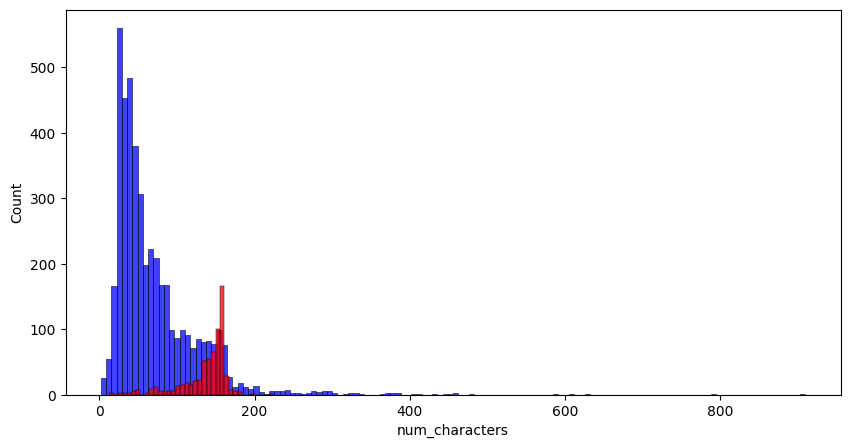

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['num_characters'],color='blue')
sns.histplot(df[df['Target']==1]['num_characters'],color='red')
plt.show()

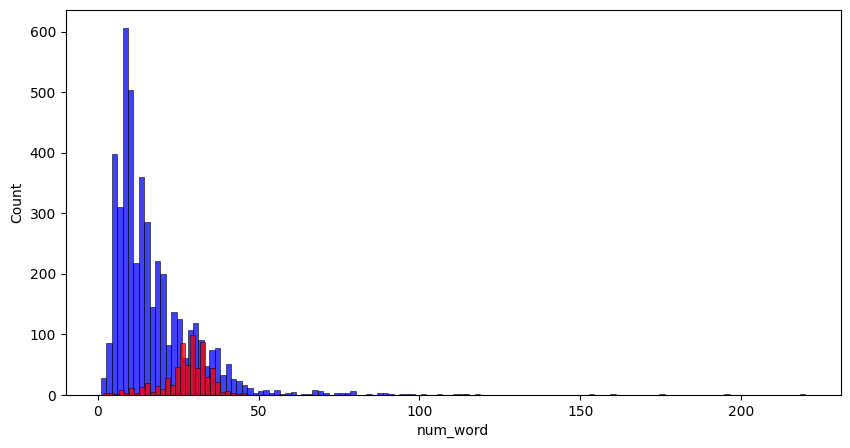

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['num_word'],color='blue')
sns.histplot(df[df['Target']==1]['num_word'],color='red')
plt.show()

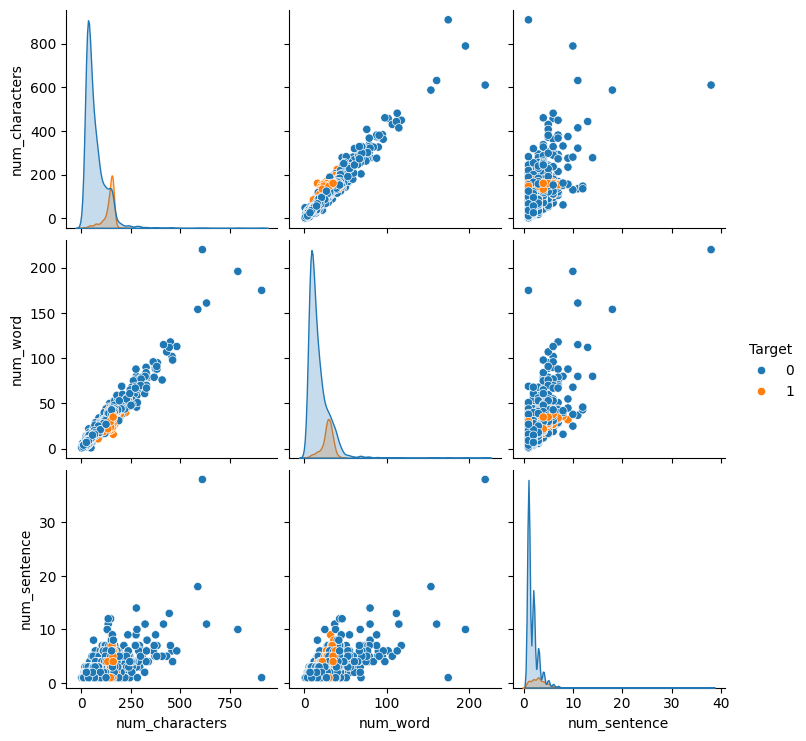

In [34]:
sns.pairplot(df,hue=('Target'))
plt.show()

<Axes: >

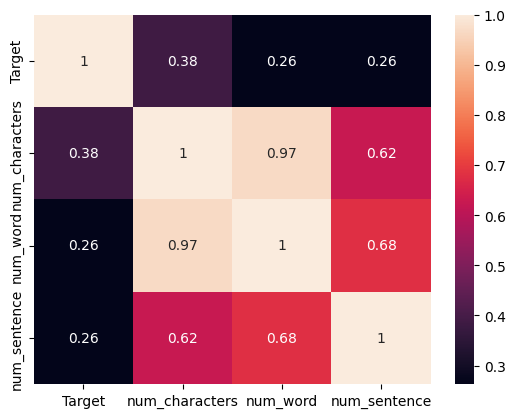

In [35]:
#Correlation matrix
df_numeric=df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(),annot=True)

In [36]:
#Data Preprocess
#Lowercase
#Tokenization
#Remove special character
#Remove stopwords
#Stemming

In [37]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [38]:
from nltk.corpus import stopwords

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Manali
[nltk_data]     Pusalkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
df['transform_text']=df['Text'].apply(transform_text)

In [42]:
df

,Target,Text,num_characters,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5566,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5567,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5568,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5569,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\Manali Pusalkar\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [44]:
from wordcloud import WordCloud
wc=WordCloud(width=700,height=700,min_font_size=10,background_color='pink')

In [45]:
spam_wc=wc.generate(df[df['Target']==1]['transform_text'].str.cat(sep=' '))

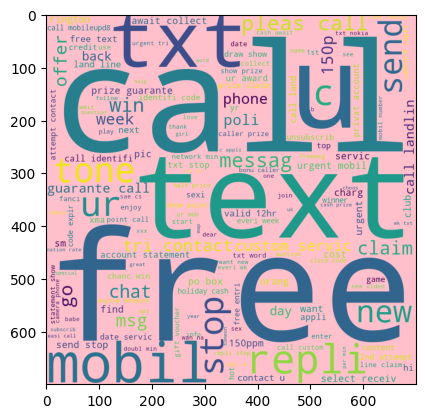

In [46]:
plt.imshow(spam_wc)

In [47]:
not_spam_wc=wc.generate(df[df['Target']==0]['transform_text'].str.cat(sep=' '))

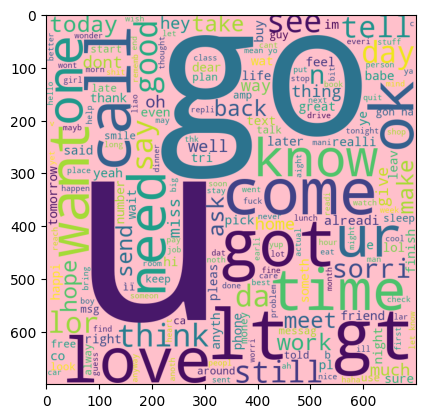

In [48]:
plt.imshow(not_spam_wc)

In [49]:
#Top 50 words
spam_corpus=[]
for msg in df[df['Target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9943

In [51]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [52]:
not_spam_corpus=[]
for msg in df[df['Target']==0]['transform_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

In [53]:
len(not_spam_corpus)

35415

In [54]:
pd.DataFrame(Counter(not_spam_corpus).most_common(50))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [55]:
#Model Building

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [57]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [58]:
X.shape

(5168, 6712)

In [59]:
y=df['Target'].values

In [60]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[798 110]
 [ 22 104]]
0.48598130841121495


In [66]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9555125725338491
[[908   0]
 [ 46  80]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9632495164410058
[[902   6]
 [ 32  94]]
0.94


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

In [69]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [72]:
df['transform_text'][5566]

'2nd time tri 2 contact u pound prize 2 claim easi call 087187272008 now1 10p per minut'

In [71]:
df

,Target,Text,num_characters,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5566,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5567,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5568,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5569,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
